import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
data_path = "../data/raw/earthquake_dataset.csv"
df = pd.read_csv(data_path)
df.head()

,magnitude,depth,cdi,mmi,sig,alert
0,7.0,14.0,8.0,7.0,0.0,green
1,6.9,25.0,4.0,4.0,-33.0,green
2,7.0,579.0,3.0,3.0,-13.0,green
3,7.3,37.0,5.0,5.0,65.0,green
4,6.6,624.0,0.0,2.0,-98.0,green


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB


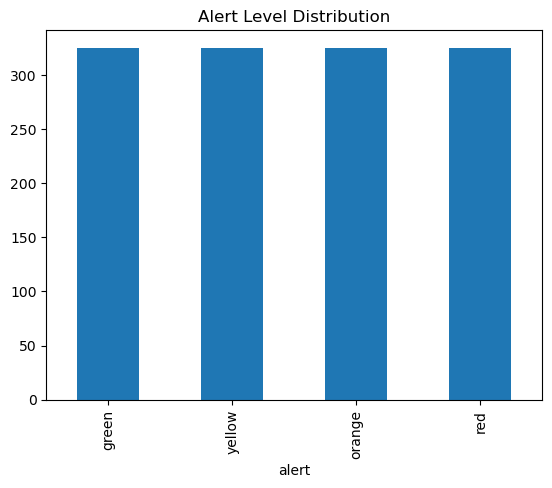

In [4]:
df.info()

df.describe()

df['alert'].value_counts().plot(kind='bar')
plt.title('Alert Level Distribution')
plt.show()

In [ ]:
df.isnull().sum()

magnitude    0
depth        0
cdi          0
mmi          0
sig          0
alert        0
dtype: int64

In [7]:
df = df.dropna()

In [ ]:
features = ['magnitude', 'depth', 'cdi', 'mmi', 'sig']
target = 'alert'

X = df[features]
y = df[target]

encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)


In [14]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    solver='lbfgs',
    max_iter=500,
    random_state=42
)


In [15]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=42)

In [16]:
y_pred = model.predict(X_test)

Model Accuracy: 0.67

Classification Report:
              precision    recall  f1-score   support

       green       0.91      0.78      0.84        65
      orange       0.54      0.42      0.47        65
         red       0.68      0.77      0.72        65
      yellow       0.57      0.71      0.63        65

    accuracy                           0.67       260
   macro avg       0.68      0.67      0.67       260
weighted avg       0.68      0.67      0.67       260



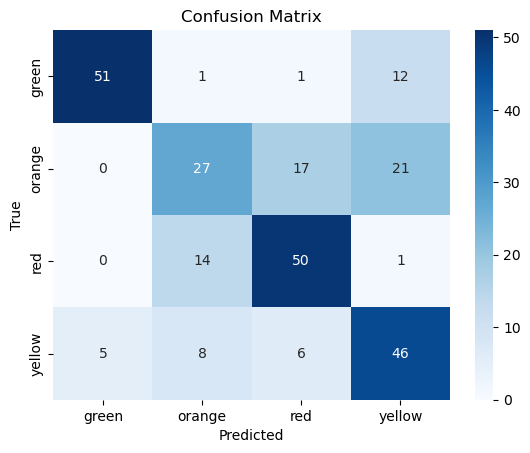

In [17]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


acc = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {acc:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()
